# AI-based cloud and cloud shadow detection processor for Sentinel-2

🚀 This notebook explains how to use cloud mask processor on the Sentinel-2 products in Python scripts.

*** 
### Before you start 

Clone this repo, download the Sentinel-2 product you want to use, and create conda environment using [environment.yml](environment.yml). Make sure that you have sub-tiling tool [cm-vsm](https://github.com/kappazeta/cm-vsm) installed.

### Import libraries

In [7]:
import json
from util import log as ulog
from architectures import ARCH_MAP
from data_generator import DataGenerator
from util.normalization import set_normalization
from util.save_prediction_masks import save_masks_contrast

import os
import numpy as np
from util.raster_mosaic import get_img_entry_id, image_grid_overlap
from util.rasterio_dep import proj_rasterio
import pathlib
from PIL import Image, ImageOps, ImageFile
from PIL.PngImagePlugin import PngInfo
import subprocess
import rasterio
from version import __version__, min_cm_vsm_version
from pkg_resources import parse_version
import math
from cm_predict import CMPredict
import matplotlib.pyplot as plt

### Create config dictionary

Adapt example config dictionary to your needs. Parameters that are needed to be changed are listed below:
1. folder_name - folder name where Sentinel-2 SAFE product is located, e.g. "data"
2. product_name - Sentinel-2 product name, e.g. "S2A_MSIL1C_20210608T103021_N0300_R108_T31TFJ_20210608T123816". Note that SAFE extension is not specified.
3. level_product - Sentinel-2 product level, L1C or L2A

In [3]:
config_dict = {
  "cm_vsm_executable" : "cm_vsm",
  "folder_name": "data",
  "product_name": "S2A_MSIL2A_20200509T094041_N0214_R036_T35VLF_20200509T111504",
  "level_product": "L2A",
  "overlapping": 0.0625,
  "tile_size": 512,
  "resampling_method" : "sinc",
  "architecture": "Unet",
  "batch_size": 1,
  "aoi_geometry": ""
}

### Create CMPredict class

In [ ]:
cmf = CMPredict()

cmf.config_from_dict(config_dict, config_dict["product_name"])

cmf.sub_tile(path_out = cmf.product_cvat, aoi_geom = None)

cmf.predict()
cmf.mosaic()

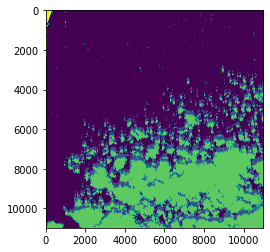

In [9]:
src = rasterio.open("prediction/S2A_MSIL2A_20200509T094041_N0214_R036_T35VLF_20200509T111504/L2A_T35VLF_20200509T094041_KZ_10m.tif")
plt.imshow(src.read(1))